<a href="https://colab.research.google.com/github/ibrayoubi10/Projet-Machine-Learning/blob/main/notebook_scitweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERROR: Could not find a version that satisfies the requirement MyNLPUtilities (from versions: none)
ERROR: No matching distribution found for MyNLPUtilities


In [1]:
#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# librairies générales
import pandas as pd
import re
from tabulate import tabulate
import time
import numpy as np
import pickle
import string
import base64
import sys
# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
# librairies scikit learn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# librairies des classifiers utilisés
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
# librairies NLTK
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/ML/projet_tweet'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%pwd

/content/gdrive/My Drive/Colab Notebooks/ML/projet_tweet


'/content/gdrive/My Drive/Colab Notebooks/ML/projet_tweet'

In [4]:
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks/ML/projet_tweet")
from MyNLPUtilities import *

In [5]:
import pandas as pd

#attention le séparateur est une tabulation
df=pd.read_csv('scitweets_export.tsv', sep='\t')
display (df.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [6]:
# Afficher la taille du DataFrame
print("Taille du DataFrame:")
display(df.shape)

# Afficher les six premières lignes
print("Six premières lignes:")
display(df.head(6))

# Afficher les trois dernières lignes
print("Trois dernières lignes:")
display(df.tail(3))

# Afficher 5 lignes au hasard
print("Cinq lignes au hasard:")
display(df.sample(5))

Taille du DataFrame:


(1140, 7)

Six premières lignes:


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0
5,6,331396203700944896,The Impact of Infertility on You and Your Rela...,0,0.0,0.0,0.0


Trois dernières lignes:


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
1137,1258,1341155832793165825,Whats the uber support team email address?,0,0.0,0.0,0.0
1138,1259,1344167355648241664,House passes bill to increase stimulus checks ...,0,0.0,0.0,0.0
1139,1260,1344485313222041600,@berriemoomin #런쥔을_공평하게_대하세요 Renjun deserve be...,0,0.0,0.0,0.0


Cinq lignes au hasard:


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
885,975,1132873918740684804,@TimesNow @narendramodi @myogiadityanath @Adit...,0,0.0,0.0,0.0
248,269,586476458907959296,Companies report 48% increase in attempted cyb...,1,1.0,0.0,0.0
920,1013,1158244647107530753,@AnnCoulter @Cernovich Doesn’t matter The medi...,0,0.0,0.0,0.0
234,254,572172464580517889,Check out B HEALING STONE & MAGNET PILLOW (THE...,1,1.0,0.0,0.0
1089,1206,1305907854088470533,"""Election laws can sometimes be robotically ap...",0,0.0,0.0,0.0


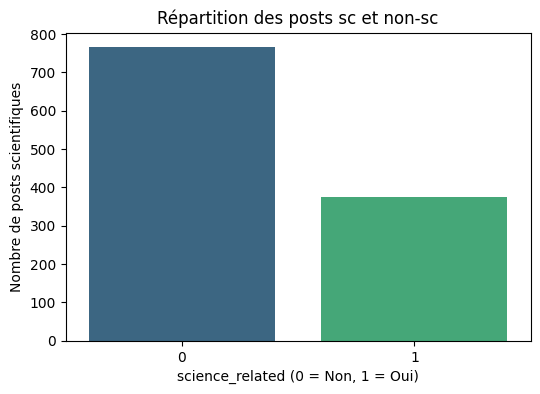

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="science_related", palette="viridis")

# Ajout des labels et du titre
plt.xlabel("science_related (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de posts scientifiques")
plt.title("Répartition des posts sc et non-sc")

# Affichage du graphique
plt.show()
